In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
plt.style.use('seaborn')
sns.set(font_scale=2.5)

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
df_train=pd.read_csv('C:/Users/cod/desktop/ML/T_train.csv')
df_test=pd.read_csv('C:/Users/cod/desktop/ML/T_test.csv')

In [3]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
cor=df_train.corr()
corr_features=cor.index[abs(cor['Survived'])>0.1]
corr_features

Index(['Survived', 'Pclass', 'Fare'], dtype='object')

<AxesSubplot:>

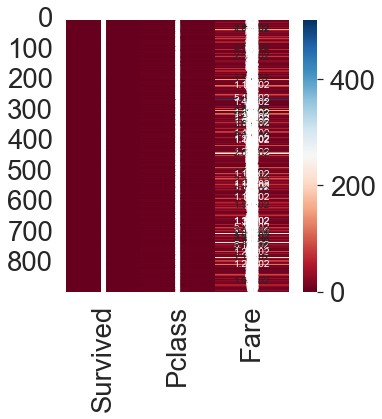

In [5]:
plt.figure(figsize=(5,5))
sns.heatmap(df_train[corr_features],annot=True,cmap='RdBu')

In [6]:
target=df_train['Survived']
df_train.drop(['Survived'],axis=1,inplace=True)

In [7]:
df_titanic=pd.concat((df_train,df_test))

In [8]:
df_titanic

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [9]:
delete=[]
for col in df_titanic.columns:
    x=df_titanic[col].isnull().sum()/df_titanic[col].shape[0]*100
    if x>30:
        print('{:<10} null percentage {:.2f}'.format(col,x))
        delete.append(col)

Cabin      null percentage 77.46


In [10]:
df_titanic.drop(['Cabin'],axis=1,inplace=True)

In [11]:
df_titanic_obj=df_titanic.select_dtypes(include='object')
df_titanic_num=df_titanic.select_dtypes(exclude='object')

In [12]:
df_titanic_obj.drop(['Name','Ticket'],axis=1,inplace=True)

In [13]:
df_titanic_obj_dummy=pd.get_dummies(df_titanic_obj,drop_first=True)

In [14]:
df_titanic_obj_dummy

,Sex_male,Embarked_Q,Embarked_S
0,1,0,1
1,0,0,0
2,0,0,1
3,0,0,1
4,1,0,1
...,...,...,...
413,1,0,1
414,0,0,0
415,1,0,1
416,1,0,1


In [15]:
df_titanic_num

,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,1,3,22.0,1,0,7.2500
1,2,1,38.0,1,0,71.2833
2,3,3,26.0,0,0,7.9250
3,4,1,35.0,1,0,53.1000
4,5,3,35.0,0,0,8.0500
...,...,...,...,...,...,...
413,1305,3,NaN,0,0,8.0500
414,1306,1,39.0,0,0,108.9000
415,1307,3,38.5,0,0,7.2500
416,1308,3,NaN,0,0,8.0500


In [16]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer()
imputer.fit(df_titanic_num)
df_titanic_num_=imputer.transform(df_titanic_num)

In [17]:
df_titanic_num=pd.DataFrame(df_titanic_num_,columns=df_titanic_num.columns)

In [18]:
df_titanic_num

,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,1.0,3.0,22.000000,1.0,0.0,7.2500
1,2.0,1.0,38.000000,1.0,0.0,71.2833
2,3.0,3.0,26.000000,0.0,0.0,7.9250
3,4.0,1.0,35.000000,1.0,0.0,53.1000
4,5.0,3.0,35.000000,0.0,0.0,8.0500
...,...,...,...,...,...,...
1304,1305.0,3.0,29.881138,0.0,0.0,8.0500
1305,1306.0,1.0,39.000000,0.0,0.0,108.9000
1306,1307.0,3.0,38.500000,0.0,0.0,7.2500
1307,1308.0,3.0,29.881138,0.0,0.0,8.0500


In [19]:
idx=df_titanic_num.index

In [20]:
df_titanic=pd.merge(df_titanic_obj_dummy,df_titanic_num,
                    left_index=True,right_index=True)

In [21]:
df_titanic.index=idx

In [22]:
df_titanic

,Sex_male,Embarked_Q,Embarked_S,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,1,0,1,1.0,3.0,22.000000,1.0,0.0,7.2500
1,1,1,0,1.0,3.0,22.000000,1.0,0.0,7.2500
2,0,0,0,2.0,1.0,38.000000,1.0,0.0,71.2833
3,0,0,1,2.0,1.0,38.000000,1.0,0.0,71.2833
4,0,0,1,3.0,3.0,26.000000,0.0,0.0,7.9250
...,...,...,...,...,...,...,...,...,...
1304,1,0,1,887.0,2.0,27.000000,0.0,0.0,13.0000
1305,0,0,1,888.0,1.0,19.000000,0.0,0.0,30.0000
1306,0,0,1,889.0,3.0,29.881138,1.0,2.0,23.4500
1307,1,0,0,890.0,1.0,26.000000,0.0,0.0,30.0000


In [23]:
df_train=df_titanic[:len(df_train)]
df_test=df_titanic[len(df_train):]

In [24]:
from sklearn.model_selection import train_test_split

X=df_train
y=target

X_train,X_val,y_train,y_val=train_test_split(X,y,shuffle=True,test_size=0.2)

In [25]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
parameter={
    'max_depth':[2,3,4],
    'n_estimator':[550,700,50],
    'colsample_bytree':[0.5,0.7,1],
    'colsample_bylevel':[0.5,0.7,1]
}
model=xgb.XGBClassifier()
grid_search=GridSearchCV(estimator=model,param_grid=parameter,cv=5,
                        scoring='neg_mean_squared_error',n_jobs=-1)
grid_search.fit(X_train,y_train)

[09:15:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_ca...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                        

In [45]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
pred_train=grid_search.predict(X_train)
pred_val=grid_search.predict(X_val)

print('train MSE score : {}'.format(mean_squared_error(pred_train,y_train)))
print('val MSE score : {}'.format(mean_squared_error(pred_val,y_val)))
print('Survived fit rate : {}%'.format(accuracy_score(pred_val,y_val)*100))

train MSE score : 0.23735955056179775
val MSE score : 0.46368715083798884
Survived fit rate : 53.63128491620112%


Text(0.5, 1.0, 'Prediction of Survived')

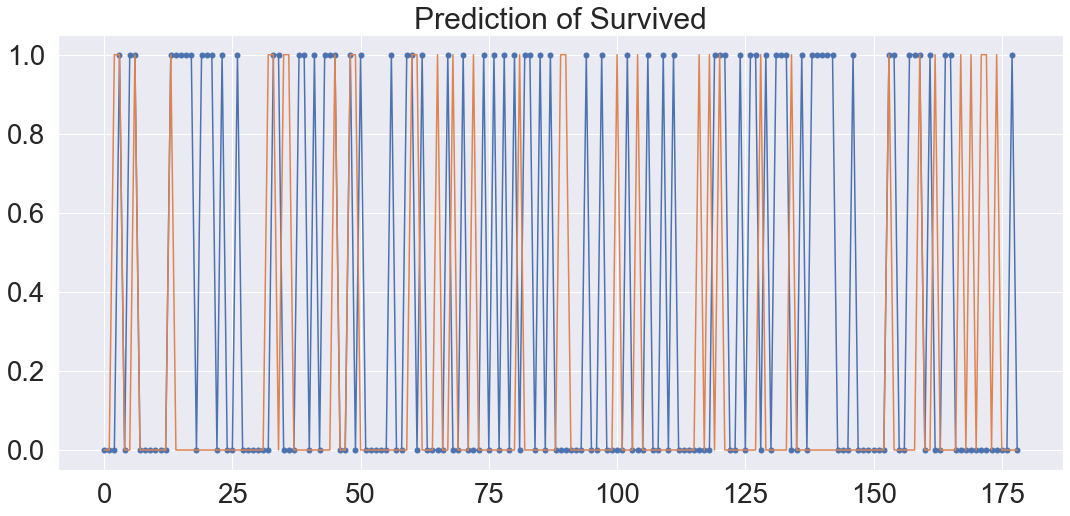

In [27]:
plt.figure(figsize=(18,8))
plt.plot(range(0,len(y_val)),y_val,'o-')
plt.plot(range(0,len(pred_val)),pred_val,'-')
plt.legend('Validation Actuals','Validation Predict',loc='best')
plt.title('Prediction of Survived')

In [28]:
test_y_pred=grid_search.predict(df_test)
id_pred_df=pd.DataFrame()
id_pred_df['Survived']=test_y_pred

In [29]:
id_pred_df

,Survived
0,0
1,0
2,0
3,0
4,0
...,...
413,0
414,0
415,0
416,0


In [34]:
submission=pd.read_csv('C:/Users/cod/Desktop/ML/gender_submission.csv')

In [35]:
submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [36]:
submission.Survived=id_pred_df['Survived']

In [41]:
submission.set_index('PassengerId',inplace=True)

In [42]:
submission.to_csv('C:/Users/cod/Desktop/xgboost_TT.csv')